### DSCI 100 008 Final Project
# Title: What it takes to be Ballin': An analysis of NBA player statistics and their effect on salary.

### Group 33: Paul Daoud | Ahnaf Kabir | Shawn Gabriel | Jackie Crowley

### Introduction

### Method and Results

#### Importing Libraries
We used functions from the `tidyverse` library to manipulate data frames and use KNN algorithms. 

In [30]:
# importing libraries
library(tidyverse)
library(dplyr)
library(tidymodels)
library(reshape2)
library(kknn)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [29]:
install.packages("gridExtra")
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### 1. Data Cleaning and Preprocessing:
- Check for missing values (none)
- Index column can be removed
- Ensure all data types are appropriate for analysis

To begin, we want to set the seed for reproducability, and load our dataset into the NBA_salary_data object.

In [4]:
set.seed(1234)

NBA_salary_data <- read.csv("nba_players_stats_with_salary.csv")

head(NBA_salary_data)
str(NBA_salary_data)
summary(NBA_salary_data)

,X,Player.Name,Salary,Position,Age,Team,GP,GS,MP,FG,⋯,TOV.,USG.,OWS,DWS,WS,WS.48,OBPM,DBPM,BPM,VORP
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,⋯,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
2,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,⋯,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
3,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,⋯,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
4,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,⋯,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
5,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,⋯,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
6,5,Bradley Beal,43279250,SG,29,WAS,50,50,33.5,8.9,⋯,12.9,29.2,2.2,1.2,3.4,0.099,2.9,-1.2,1.8,1.6


'data.frame':	467 obs. of  52 variables:
 $ X            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Player.Name  : chr  "Stephen Curry" "John Wall" "Russell Westbrook" "LeBron James" ...
 $ Salary       : int  48070014 47345760 47080179 44474988 44119845 43279250 42492492 42492492 42492492 42492492 ...
 $ Position     : chr  "PG" "PG" "PG" "PF" ...
 $ Age          : int  34 32 34 38 34 29 31 32 28 32 ...
 $ Team         : chr  "GSW" "LAC" "LAL/LAC" "LAL" ...
 $ GP           : int  56 34 73 55 47 50 52 56 63 58 ...
 $ GS           : int  56 3 24 54 47 50 50 56 63 58 ...
 $ MP           : num  34.7 22.2 29.1 35.5 35.6 33.5 33.6 34.6 32.1 36.3 ...
 $ FG           : num  10 4.1 5.9 11.1 10.3 8.9 8.6 8.2 11.2 9.6 ...
 $ FGA          : num  20.2 9.9 13.6 22.2 18.3 17.6 16.8 17.9 20.3 20.7 ...
 $ FG.          : num  0.493 0.408 0.436 0.5 0.56 0.506 0.512 0.457 0.553 0.463 ...
 $ X3P          : num  4.9 1 1.2 2.2 2 1.6 2 2.8 0.7 4.2 ...
 $ X3PA         : num  11.4 3.2 3.9 6.9 4.9 4.4 4.8 7.6 2.7 11.3 .

       X         Player.Name            Salary           Position        
 Min.   :  0.0   Length:467         Min.   :    5849   Length:467        
 1st Qu.:116.5   Class :character   1st Qu.: 1782621   Class :character  
 Median :233.0   Mode  :character   Median : 3722040   Mode  :character  
 Mean   :233.0                      Mean   : 8416599                     
 3rd Qu.:349.5                      3rd Qu.:10633544                     
 Max.   :466.0                      Max.   :48070014                     
                                                                         
      Age            Team                 GP              GS       
 Min.   :19.00   Length:467         Min.   : 1.00   Min.   : 0.00  
 1st Qu.:23.00   Class :character   1st Qu.:31.00   1st Qu.: 1.00  
 Median :25.00   Mode  :character   Median :55.00   Median : 8.00  
 Mean   :25.82                      Mean   :48.23   Mean   :22.65  
 3rd Qu.:29.00                      3rd Qu.:68.50   3rd Qu.:45.50  


Right away, we notice a couple strange housekeeping issues. For example, in our original data file, all the column names were written our nicely. Yet when we loaded it into a data set, some column names have been changed. Because we are dealing with up to 52 columns, it is crucial that we are all on the same page with what these columns are named. Furthermore, some column names in the original file are not very R-friendly (such as "3P%"), let's change these to be descriptive and syntactically friendly. Let's see what they have been changed to and fix them accordingly

In [5]:
print(colnames(NBA_salary_data))

 [1] "X"             "Player.Name"   "Salary"        "Position"     
 [5] "Age"           "Team"          "GP"            "GS"           
 [9] "MP"            "FG"            "FGA"           "FG."          
[13] "X3P"           "X3PA"          "X3P."          "X2P"          
[17] "X2PA"          "X2P."          "eFG."          "FT"           
[21] "FTA"           "FT."           "ORB"           "DRB"          
[25] "TRB"           "AST"           "STL"           "BLK"          
[29] "TOV"           "PF"            "PTS"           "Total.Minutes"
[33] "PER"           "TS."           "X3PAr"         "FTr"          
[37] "ORB."          "DRB."          "TRB."          "AST."         
[41] "STL."          "BLK."          "TOV."          "USG."         
[45] "OWS"           "DWS"           "WS"            "WS.48"        
[49] "OBPM"          "DBPM"          "BPM"           "VORP"         


In [6]:
names(NBA_salary_data)[names(NBA_salary_data) == "Player.Name"] <- "Player_Name"

names(NBA_salary_data)[names(NBA_salary_data) == "X"] <- "Index"

names(NBA_salary_data)[names(NBA_salary_data) == "X3P"] <- "Three_Pts_Made"

names(NBA_salary_data)[names(NBA_salary_data) == "X3PA"] <- "Three_Pt_Atmps"

names(NBA_salary_data)[names(NBA_salary_data) == "X3P."] <- "Three_Pt_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "X2PA"] <- "Two_Pt_Atmps"

names(NBA_salary_data)[names(NBA_salary_data) == "X2P"] <- "Two_Pt_Made"

names(NBA_salary_data)[names(NBA_salary_data) == "X2P."] <- "Two_Pt_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "eFG."] <- "eFG_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "FT."] <- "FT_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "FG."] <- "FG_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "Total.Minutes"] <- "Total_Minutes"

names(NBA_salary_data)[names(NBA_salary_data) == "TS."] <- "TS_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "X3PAr"] <- "Three_Pt_AR"

names(NBA_salary_data)[names(NBA_salary_data) == "ORB."] <- "ORB_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "DRB."] <- "DRB_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "TRB."] <- "TRB_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "AST."] <- "AST_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "STL."] <- "STL_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "BLK."] <- "BLK_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "TOV."] <- "TOV_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "USG."] <- "USG_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "WS_48"] <- "WS_48M"

In [7]:
print(colnames(NBA_salary_data))

 [1] "Index"          "Player_Name"    "Salary"         "Position"      
 [5] "Age"            "Team"           "GP"             "GS"            
 [9] "MP"             "FG"             "FGA"            "FG_Pct"        
[13] "Three_Pts_Made" "Three_Pt_Atmps" "Three_Pt_Pct"   "Two_Pt_Made"   
[17] "Two_Pt_Atmps"   "Two_Pt_Pct"     "eFG_Pct"        "FT"            
[21] "FTA"            "FT_Pct"         "ORB"            "DRB"           
[25] "TRB"            "AST"            "STL"            "BLK"           
[29] "TOV"            "PF"             "PTS"            "Total_Minutes" 
[33] "PER"            "TS_Pct"         "Three_Pt_AR"    "FTr"           
[37] "ORB_Pct"        "DRB_Pct"        "TRB_Pct"        "AST_Pct"       
[41] "STL_Pct"        "BLK_Pct"        "TOV_Pct"        "USG_Pct"       
[45] "OWS"            "DWS"            "WS"             "WS.48"         
[49] "OBPM"           "DBPM"           "BPM"            "VORP"          


MUCH better. It was a bit tedious, but it will make our work later on a lot easier and less prone to errors. Let's continue.

Now, let's check if there are any duplicate entries or columns. 

In [8]:
# Check for duplicate rows
duplicate_rows <- NBA_salary_data[duplicated(NBA_salary_data), ]

# View the duplicate rows
head(duplicate_rows)

# Count the number of duplicate rows
num_duplicate_rows <- nrow(duplicate_rows)
print(paste("Number of duplicate rows:", num_duplicate_rows))

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Index,Player_Name,Salary,Position,Age,Team,GP,GS,MP,FG,⋯,TOV_Pct,USG_Pct,OWS,DWS,WS,WS.48,OBPM,DBPM,BPM,VORP
<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


[1] "Number of duplicate rows: 0"


Great! We do not have any duplicate rows!

Now, let's check to see if there are any missing cells (cells labeled 'NA").

In [9]:
sum(is.na(NBA_salary_data))

[1] 45

45 is a lot of missing cells. We must deal with this. I have a guess as to why though. It's due to the nature of some of our columns, specifically the ones that are percentages (such as Free-Throw %). Certain players in the NBA could go the entire season without getting much playing time, and therefore not even attempting a certain type of shot. For example, perhaps a Center who is the 4th option on the team will likely get very minimal playing time, and it is even more unlikely that during their very limited playing time, they are in a position to shoot a 3-Pointer. This would result in their 3-Pt percentage being "NA" since there were no attempts. 

Let's isolate these specific cells to get a better look. 

In [10]:
# Find the columns with the NA values
cols_with_na_vals <- colnames(NBA_salary_data)[colSums(is.na(NBA_salary_data)) > 0]

# Find the rows with the NA values
rows_with_na_vals <- rowSums(is.na(NBA_salary_data)) > 0

na_subset <- NBA_salary_data %>%
filter(rows_with_na_vals) %>%
select(Player_Name, all_of(cols_with_na_vals))

na_subset


Player_Name,FG_Pct,Three_Pt_Pct,Two_Pt_Pct,eFG_Pct,FT_Pct,TS_Pct,Three_Pt_AR,FTr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mitchell Robinson,0.671,NA,0.671,0.671,0.484,0.652,0.000,0.436
Mason Plumlee,0.680,NA,0.680,0.680,0.636,0.689,0.000,0.647
Dylan Windler,0.667,0.500,1.000,0.833,NA,0.833,0.667,0.000
Mark Williams,0.637,NA,0.637,0.637,0.691,0.659,0.000,0.386
Sterling Brown,0.000,0.000,0.000,0.000,NA,0.000,0.500,0.000
Joe Wieskamp,0.214,0.250,0.000,0.321,NA,0.321,0.857,0.000
Bismack Biyombo,0.578,NA,0.578,0.578,0.357,0.555,0.000,0.340
Udoka Azubuike,0.819,NA,0.819,0.819,0.350,0.774,0.000,0.278
Daniel Gafford,0.732,NA,0.732,0.732,0.679,0.739,0.000,0.473


Now, looking through this subset, we see ALL of the NA cells, and we also can determine the reason that they are "NA". The columns that possess NA values are Field-Goal percentage, Three-Point percentage, Two-Point percentage, effective Field-Goal percentage, Free-Throw percentage, True Shooting percentage, Three-Point rate, or Free-Throw rate. All of these cells with NA values are due to that specific player not attempting a certain type of shot or a field-goal over the course of the ENTIRE season. 

In some cases, it is a natural occurrence. For example, Mason Plumlee is a centre who does not usually play more 20 minutes per game. He is rarely in a position to attempt a three-point shot, therefore resulting in his Three-Point Percentage being NA. 

This is a complex problem, and one that likely falls outside the scope of DSCI 100. To strive to do the best we can do, one option of dealing with this would be to replace the NA cells with 0. This would solve the existence of NA's while also being striving not to skew the data too much. Since there are only 45 NA cells in a dataset of close to 24,000 cells, our changes will have very little effect.

In [11]:
NBA_salary_data[is.na(NBA_salary_data)] <- 0


Now, let's run our previous code block again to confirm there are no NA cells left.

In [12]:
# Find the columns with the NA values
cols_with_na_vals <- colnames(NBA_salary_data)[colSums(is.na(NBA_salary_data)) > 0]

# Find the rows with the NA values
rows_with_na_vals <- rowSums(is.na(NBA_salary_data)) > 0

na_subset <- NBA_salary_data %>%
filter(rows_with_na_vals) %>%
select(Player_Name, all_of(cols_with_na_vals))

na_subset

Player_Name
<chr>


Perfect! We have successfully wrangled and cleaned our data.

### 2. Exploratory Data Analysis (EDA):
- Examine the distribution of key variables like salary, age, and performance metrics
- Look for any outliers or anomalies
- Exploratory Data Analysis (EDA): This would involve creating visualizations to understand the distribution of salaries, the relationship between different performance metrics and salary, etc.

Now moving onto Step 2, we can use some tools in the "ggplot2" to create some plots and explore our dataset. This will allow us to visualize how certain variables such as salary are distributed, and can give us initial ideas as to which performance stats will be most highly correlated with salary.

Let's start with plotting the distribution of NBA salaries.

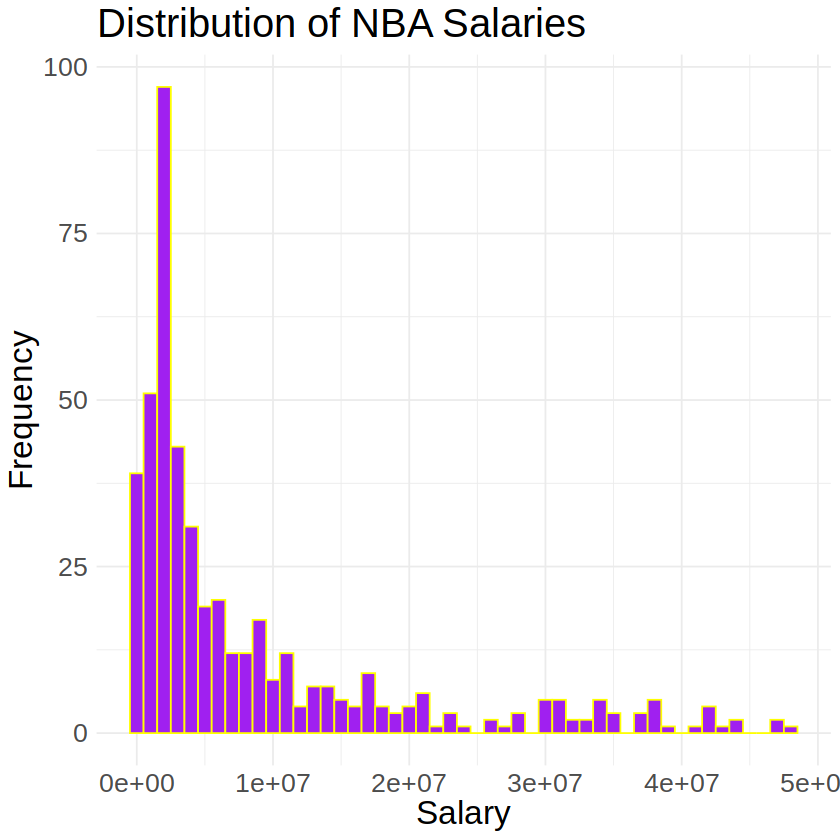

In [13]:
ggplot(NBA_salary_data, aes(x = Salary)) +
geom_histogram(binwidth = 1000000, fill = "purple", color = "yellow") +
theme_minimal() +
labs(title = "Distribution of NBA Salaries", x = "Salary", y = "Frequency") +
theme(text = element_text(size = 20))

This salary distributions shows us that the majority of NBA Players make around 500,000 - 1M USD per year, while there are a significantly small portion of players making around 30M to 50M. It is safe to say that most NBA Players are quite well off. This right-skewed distribution would normally be problematic for our regression model, but let's test it first and then see if it affects it. *EDIT

### 3. Correlation Analysis:
- Investigate the correlation between different performance metrics and salaries (correlation matrix)
- Identify top prospects for good salary predictors

Now that we have successfully loaded our dataset and tidied it up, we can now work on figuring out which statistics will most likely be good predictors for salary, and explore those further.

For example, we can generally assume that stats such as minutes played or steals per game will not be as influential on salary as points per game or win shares, but how would we be certain about which statistics are best predictors?

A common way of figuring out which two variables have a strong relationship between each other, especially in a setting such as ours where we are not quite sure what the nature of the relationship might be, is to use a correlation matrix (REF= https://towardsdatascience.com/correlation-matrix-demystified-3ae3405c86c1). This will tell us which variables have a strong correlation with each other, which is a good basis for further exploration. If we find some performance metrics have very low correlation with salary, we can effectively rule those out. 

In [14]:
target_performance_stats <- subset(NBA_salary_data, select = -c(Index, Position, Player_Name, Position, Team))

cor_matrix <- cor(target_performance_stats, use = "complete.obs")

Now, we have created the correlation matrix, let's rank them in descending order to isolate the top 10 variables with high correlations to Salary.

In [15]:
salary_correlations <- cor_matrix["Salary", ]

sorted_salary_correlations <- sort(salary_correlations, decreasing = TRUE)

# Convert the sorted correlations to a data frame
sorted_salary_correlations_df <- data.frame(
  Variable = names(sorted_salary_correlations),
  Correlation = sorted_salary_correlations)

top_10 <- slice(sorted_salary_correlations_df, 1:11)

top_10

,Variable,Correlation
,<chr>,<dbl>
Salary,Salary,1.0000000
PTS,PTS,0.7275967
FG,FG,0.7202600
FGA,FGA,0.7063930
Two_Pt_Atmps,Two_Pt_Atmps,0.6819264
VORP,VORP,0.6803390
Two_Pt_Made,Two_Pt_Made,0.6764062
FT,FT,0.6737723
FTA,FTA,0.6686381


Interesting! It is surprising that 3-Point percentage is not in the top 10, keeping in mind the highest paid NBA athlete last season was Steph Curry, who is well-known for being one of the best 3-Point shooters of all time. 
We have successfully narrowed down our variables from almost 50 to 10. Our next task is to identify if any statistics have high correlations with each other, as we do not want to include statistics that are essentially telling us the same information. 

An effective, visual way to do this would be to use a heatmap. 

### 4. Feature Selection:
- Based on the EDA and correlation analysis, select relevant features for modeling.
- Consider excluding columns that may not contribute to the prediction of salary

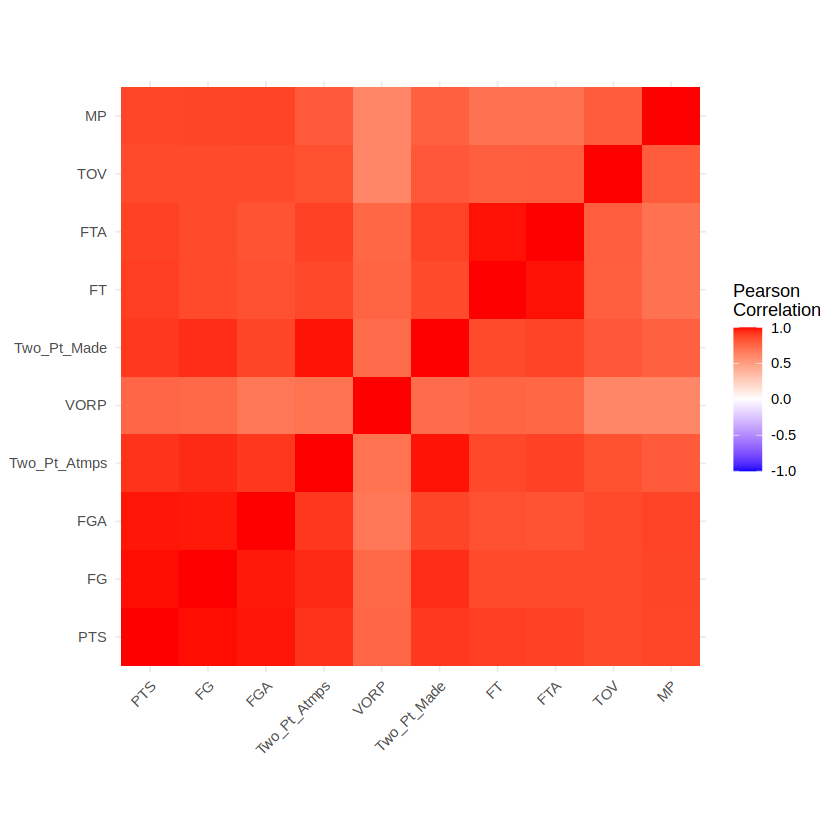

In [16]:
# Assuming 'cor_matrix' is your full correlation matrix
salary_correlations <- cor_matrix["Salary", ]
sorted_salary_correlations <- sort(salary_correlations, decreasing = TRUE)

# Get the names of the top 10 variables (excluding 'Salary' itself)
top_10_variables <- names(sorted_salary_correlations)[2:11]

# Create a subset of the correlation matrix
subset_cor_matrix <- cor_matrix[top_10_variables, top_10_variables]

# Transform to long format
library(reshape2)
melted_cor_matrix <- melt(subset_cor_matrix)


ggplot(data = melted_cor_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_blank()) +
  coord_fixed()

This is a great heatmap, with lots of useful information. From the heatmap, we can identity which stats are telling us similar information (basically, which ones have high correlation with eachother) in which case we can just select one of them. Let's go through each variable:

PTS, FG, FGA: This is points per game, and it has high correlation with FG and FGA. Since **PTS** has highest correlation with salary out of the 3, we will choose it and disregard FG and FGA.

VORP: Value over role player is an interesting statistic. **VORP** calculates a box-score estimate of the points per 100 team possessions that a player scores over a replacement player translated to the average team over a full NBA season (REF: https://www.sportskeeda.com/basketball/what-vorp-mean-nba-exploring-advanced-stat-determines-player-s-impact#:~:text=It%20stands%20for%20%E2%80%9CValue%20Over,over%20a%20full%20NBA%20season.). We see that this has a low correlation with all other top 10 stats, proving it to be a very valuable metric we should use to build our predictor. 

Two_Pt_Made, Two_Pt_Atmps: These two variables are highly correlated, which makes sense. Since **Two_Pt_Made** ranks higher, we will choose it as a variable in our predictive model. 

FT, FTA: These two also have a lot to do with eachother, which makes sense. Since **FT** is ranked higher, we will use it.

TOV: This is an estimate of turnovers per 100 plays. And turnovers are generally a negative statistic when it comes to NBA players. However, a counter-intuitive perspective will also see that having high turnover rate also means you are handling the ball a lot, which could be indicative of a player that the team trusts to facilitate the offense. This will be a useful statistic as well.

MP: This is minutes played. It will be a useful stat. 

In conclusion, we will be using PTS, VORP, Two_Pt_Made, FT, TOV, and MP as our variables to build our predictive model!


### 5. Modelling:
- Regression models, start with linear regression and then see if more complex ones are necessary

Let's begin building our linear regression model!

First, we will split the data into training and testing sets. 

In [17]:
set.seed(1234)
NBA_salary_split <- initial_split(NBA_salary_data, prop = 0.6, strata = Salary)
NBA_salary_train <- training(NBA_salary_split)
NBA_salary_test <- testing(NBA_salary_split)

We now have our training data, let's create the model specification and recipe, and fit our regression model accordingly. 

To start off, we will just try performing linear regression with one variable. Since PTS was the No.1 ranked in the correlation matrix, we will use it.

In [18]:
# Training our model
lm_spec <- linear_reg() %>%
set_engine("lm") %>%
set_mode("regression")

lm_recipe <- recipe(Salary ~ PTS, data = NBA_salary_train)

lm_fit <- workflow() %>%
add_recipe(lm_recipe) |>
add_model(lm_spec) |>
fit(data = NBA_salary_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          PTS  
   -1607206      1108985  


We have successfully developed our model. Let's plot it and analyze visually.

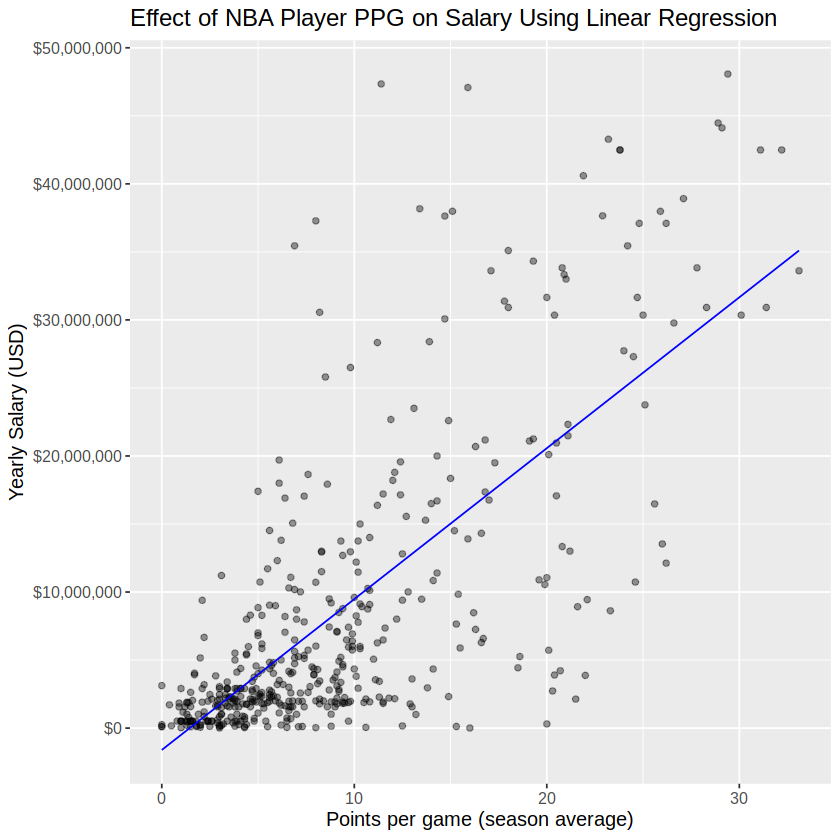

In [19]:
NBA_sal_prediction_grid <- tibble(
    PTS = c(
        NBA_salary_data |> select(PTS) |> min(),
        NBA_salary_data |> select(PTS) |> max()
    )
)

NBA_sal_preds <- lm_fit |>
  predict(NBA_sal_prediction_grid) |>
  bind_cols(NBA_sal_prediction_grid)

lm_plot_final <- ggplot(NBA_salary_data, aes(x = PTS, y = Salary)) +
  geom_point(alpha = 0.4) +
  geom_line(data = NBA_sal_preds, 
            mapping = aes(x = PTS, y = .pred), 
            color = "blue") +
  xlab("Points per game (season average)") +
  ylab("Yearly Salary (USD)") +
  ggtitle("Effect of NBA Player PPG on Salary Using Linear Regression") +
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

lm_plot_final

This plot shows us how our model works visually. As we can see, in the upper right portion of the graph. we get a lot of space between points. This translates to two key observations:
- There is significantly less players with salaries about 30M than below 30M. 
- The small section of really good players are paid a wide range in terms of salary, even if some players have the same points per game as others.

Now, we can test our effective our model is by using RMSPE assessment. 

### 6. Model Evaluation:
- Evaluate model's performance with RMSE
- Check for underfitting or overfitting

In [20]:
lm_test_results <- lm_fit |>
predict(NBA_salary_test) |>
bind_cols(NBA_salary_test) |>
metrics(truth = Salary, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7.405379e+06
rsq,standard,5.443451e-01
mae,standard,4.802405e+06


This is not THAT bad. We found our model has a test error as assessed by RMSPE of about \\$7.4M. That is quite a substantial amount of money, but considering how some contracts can be very high, this might not be too bad.

The second observation from our plot tells us that perhaps points per game is not the only statistic that determines salary. But even with just using points per game, we were able to create a fairly accurate predictive model. I hypothesize that if we include our other variables, we will be able to create an even better predictive model. Let's get started!

### Multivariable Linear Regression

In [21]:
# Training our new multivariable model
lm_spec <- linear_reg() %>%
set_engine("lm") %>%
set_mode("regression")

mlm_recipe <- recipe(Salary ~ PTS + VORP + Two_Pt_Made + FT + TOV + MP, data = NBA_salary_train)

mlm_fit <- workflow() %>%
add_recipe(mlm_recipe) |>
add_model(lm_spec) |>
fit(data = NBA_salary_train)

mlm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          PTS         VORP  Two_Pt_Made           FT          TOV  
   -1207893       481659      2758532       448907      -449851      1270186  
         MP  
     102384  


In [22]:
lm_mult_test_results <- mlm_fit |>
predict(NBA_salary_test) |>
bind_cols(NBA_salary_test) |>
metrics(truth = Salary, estimate = .pred)

lm_mult_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7.033626e+06
rsq,standard,5.887879e-01
mae,standard,4.566216e+06


Using all of our variables, we cut the error from \\$7.4M to about \\$7M. That is about a \\$400,000 improvement. That is a decent improvement!

Out of curiosity, let's try using KNN regression and see if our model would be better.

### KNN Regression Model

In [23]:
set.seed(1234)
NBA_salary_split <- initial_split(NBA_salary_data, prop = 0.75, strata = Salary)
NBA_salary_train <- training(NBA_salary_split)
NBA_salary_test <- testing(NBA_salary_split)

In [24]:
NBA_sal_recipe <- recipe(Salary ~ PTS, data = NBA_salary_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors()) 

NBA_sal_spec <- nearest_neighbor(weight_func = "rectangular",
                                 neighbors = tune()) |>

set_engine("kknn") |>
set_mode("regression")

NBA_sal_vfold <- vfold_cv(NBA_salary_train, v = 5, strata = Salary)

NBA_sal_wkflw <- workflow() |>
add_recipe(NBA_sal_recipe) |>
add_model(NBA_sal_spec)

NBA_sal_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [31]:
set.seed(1234)
library(gridExtra)

gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))

NBA_sal_results <- NBA_sal_wkflw |>
tune_grid(resamples = NBA_sal_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "rmse")

NBA_sal_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,9770587,5,666913.7,Preprocessor1_Model01
4,rmse,standard,7965372,5,571061.8,Preprocessor1_Model02
7,rmse,standard,7474736,5,452288.9,Preprocessor1_Model03
10,rmse,standard,7353704,5,346896.3,Preprocessor1_Model04
13,rmse,standard,7373336,5,346057.4,Preprocessor1_Model05
16,rmse,standard,7381148,5,326174.3,Preprocessor1_Model06
19,rmse,standard,7436423,5,306740.9,Preprocessor1_Model07
22,rmse,standard,7474728,5,280707.3,Preprocessor1_Model08
25,rmse,standard,7486857,5,284643.8,Preprocessor1_Model09


In [32]:
NBA_Kval_min <- NBA_sal_results |>
filter(mean == min(mean))

NBA_Kval_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,rmse,standard,7353704,5,346896.3,Preprocessor1_Model04


The best K value is 10!

In [33]:
kmin <- NBA_Kval_min |> pull(neighbors)

NBA_sal_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

NBA_sal_fit <- workflow() |>
  add_recipe(NBA_sal_recipe) |>
  add_model(NBA_sal_spec) |>
  fit(data = NBA_salary_train)

NBA_sal_summary <- NBA_sal_fit |>
  predict(NBA_salary_test) |>
  bind_cols(NBA_salary_test) |>
  metrics(truth = Salary, estimate = .pred) |>
  filter(.metric == 'rmse')

NBA_sal_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8351371


Our KNN regression model had an RMSPE assessed error of \\$8.3M . This is a larger error than our linear regression by about \\$1.4M. Our linear regression model is more accurate. 

### Analysis

In [32]:
R.version.string

[1] "R version 3.6.1 (2019-07-05)"

In [ ]:
##Test commit

### Discussion

### References